## DATA

In [1]:
import pandas as pd
raw=pd.read_csv(r"C:\Users\PC\Desktop\datasets\COVID clinical trials.csv",dtype=str, keep_default_na=False, na_values=["", "NA", "NaN"])
raw.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


## IMPORTS 

In [2]:
import re
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
pd.set_option("display.max_colwidth",500)

The re module in Python, which stands for "regular expressions," is used for pattern matching and text manipulation within strings. It provides a powerful and flexible way to:
* Search for patterns: Locate specific sequences of characters within a string.
* Match patterns: Determine if a string or a part of a string conforms to a defined pattern.
* Substitute patterns: Replace occurrences of a pattern with another string.
* Split strings: Divide a string into a list of substrings based on a pattern.

In [3]:
df = raw.copy()
df.shape

(5783, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     5783 non-null   object
 1   NCT Number               5783 non-null   object
 2   Title                    5783 non-null   object
 3   Acronym                  2480 non-null   object
 4   Status                   5783 non-null   object
 5   Study Results            5783 non-null   object
 6   Conditions               5783 non-null   object
 7   Interventions            4897 non-null   object
 8   Outcome Measures         5748 non-null   object
 9   Sponsor/Collaborators    5783 non-null   object
 10  Gender                   5773 non-null   object
 11  Age                      5783 non-null   object
 12  Phases                   3322 non-null   object
 13  Enrollment               5749 non-null   object
 14  Funded Bys               5783 non-null  

## Column Names Edit

In [5]:
def canon(s):
    return (s.strip()
              .lower()
              .replace(" ", "_")
              .replace("/", "_")
              .replace("-", "_"))
df.columns = [canon(c) for c in df.columns]
df.columns = df.columns.str.strip().str.lower().str.replace(" ","_")

In [6]:
df.isnull().sum()

rank                          0
nct_number                    0
title                         0
acronym                    3303
status                        0
study_results                 0
conditions                    0
interventions               886
outcome_measures             35
sponsor_collaborators         0
gender                       10
age                           0
phases                     2461
enrollment                   34
funded_bys                    0
study_type                    0
study_designs                35
other_ids                     1
start_date                   34
primary_completion_date      36
completion_date              36
first_posted                  0
results_first_posted       5747
last_update_posted            0
locations                   585
study_documents            5601
url                           0
dtype: int64

## Deleting Unnecessary Columns

In [7]:
df = df.drop(columns=['url','other_ids'])

In [8]:
df.drop(columns=["study_documents","results_first_posted"],inplace=True)

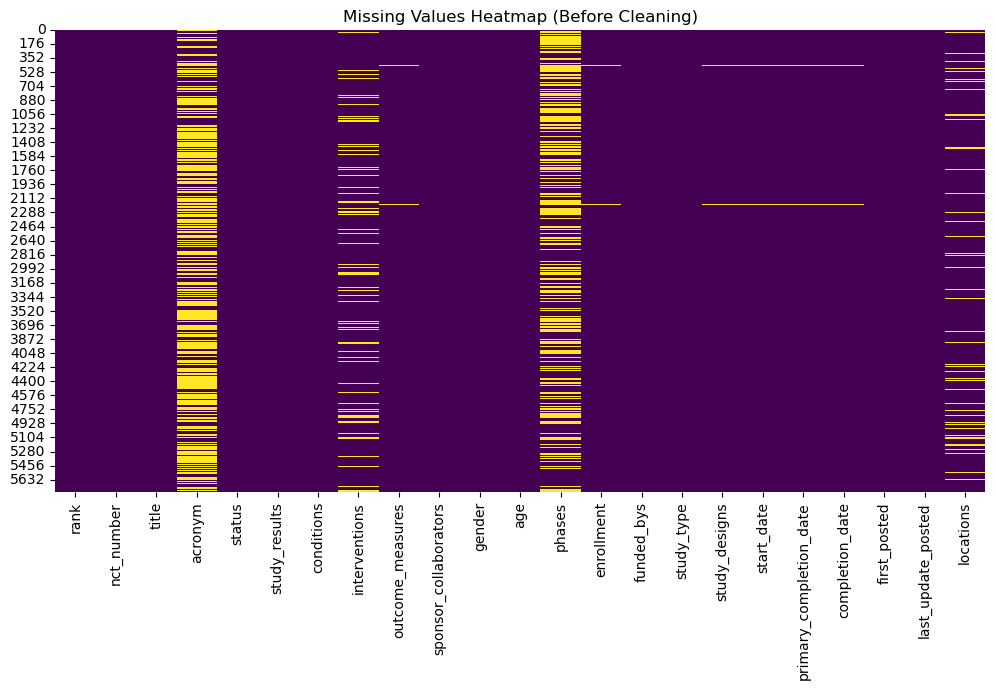

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Before Cleaning)")
plt.show()

## Handling missing values

In [9]:
for col in ["acronym", "interventions", "phases", "locations"]:
    df[col] = df[col].fillna("Unknown")

In [10]:
df["enrollment"] = pd.to_numeric(df["enrollment"], errors="coerce")
df["enrollment"] = df["enrollment"].fillna(df["enrollment"].median())

In [11]:
df["gender"] = df["gender"].fillna("All")

In [12]:
df["outcome_measures"] = df["outcome_measures"].fillna("not reported")
df["study_designs"] = df["study_designs"].fillna("not reported")

In [13]:
date_cols = ["start_date", "primary_completion_date", "completion_date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

##  Handles formats like '9-Nov-20', 'May-21', '2020-11-09', etc.

In [14]:
DATE_COLS = [
    "start_date",
    "primary_completion_date",
    "completion_date",
    "first_posted",
    "results_first_posted",
    "last_update_posted"
]


def parse_date_series(s):
    return pd.to_datetime(s, errors="coerce", dayfirst=True, infer_datetime_format=True)

for col in DATE_COLS:
    if col in df.columns:
        df[col] = parse_date_series(df[col])
        print(f"Parsed {col}")
    else:
        print(f"Skipping {col} (not in DataFrame)")

for col in DATE_COLS:
    if col in df.columns:
        invalid_dates = df.loc[
            df[col].isna() & df[col].astype(str).str.contains(r"[A-Za-z]", na=False),
            col
        ]
        print(f"\n{col} unique invalid values:")
        print(invalid_dates.unique()[:20])  # show up to 20 examples


Parsed start_date
Parsed primary_completion_date
Parsed completion_date
Parsed first_posted
Skipping results_first_posted (not in DataFrame)
Parsed last_update_posted

start_date unique invalid values:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

primary_completion_date unique invalid values:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

completion_date unique invalid values:
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]

first_posted unique invalid values:
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]

last_update_posted unique invalid values:
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]


C:\Users\PC\AppData\Local\Temp\ipykernel_20824\3262167139.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="coerce", dayfirst=True, infer_datetime_format=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_20824\3262167139.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="coerce", dayfirst=True, infer_datetime_format=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_20824\3262167139.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. 

In [15]:
df.isnull().sum()

rank                          0
nct_number                    0
title                         0
acronym                       0
status                        0
study_results                 0
conditions                    0
interventions                 0
outcome_measures              0
sponsor_collaborators         0
gender                        0
age                           0
phases                        0
enrollment                    0
funded_bys                    0
study_type                    0
study_designs                 0
start_date                  520
primary_completion_date    1462
completion_date            1525
first_posted                  0
last_update_posted            0
locations                     0
dtype: int64

## Standardize Text Columns

In [16]:
text_cols = ["title", "status", "conditions", "interventions", 
             "sponsor_collaborators", "funded_bys", 
             "study_type", "study_designs", "outcome_measures", "locations"]
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

## Clean & Reformat Categorical Columns

In [17]:
df["study_designs"] = df["study_designs"].apply(lambda x: x.split("|") if isinstance(x, str) else[])
df["conditions"] = df["conditions"].apply(lambda x: x.split("|") if isinstance(x, str) else[])
df["interventions"] = df["interventions"].apply(lambda x: x.split("|") if isinstance(x,str)else[])

## Normalize Enrollment Numbers

In [18]:
df.loc[df["enrollment"] > 1000000, "enrollment"] = np.nan
df["enrollment"] = df["enrollment"].fillna(df["enrollment"].median())

## Phase Ordered

In [19]:
phase_order = ["unknown", "not applicable", "phase 1", "phase 2", "phase 3", "phase 4"]
df["phases"] = df["phases"].astype(str).str.lower()
df["phases"] = pd.Categorical(df["phases"], categories=phase_order, ordered=True)

In [20]:
df.loc[(df["phases"].isna()) & (df["study_type"]=="observational"), "phases"] = "not applicable"
df["phases"].fillna("unknown", inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_20824\522258175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["phases"].fillna("unknown", inplace=True)


## Sponsor/collaborators categorized

In [21]:
df.assign(
    sponsor_collaborators=df['sponsor_collaborators'].str.split('|')
).explode('sponsor_collaborators')
df['sponsor_collaborators'].str.strip()
df['sponsor_collaborators'].value_counts()

sponsor_collaborators
assistance publique - hôpitaux de paris                                                                                                                                                                                                                78
assiut university                                                                                                                                                                                                                                      57
university hospital, strasbourg, france                                                                                                                                                                                                                40
university hospital, montpellier                                                                                                                                                                                                    

In [22]:
def categorize_sponsor(name):
    name_lower = name.lower()
    if "university" in name_lower:
        return "University"
    elif "hospital" in name_lower or "centre hospitalier" in name_lower:
        return "Hospital"
    elif "inc" in name_lower or "ltd" in name_lower or "pharma" in name_lower or "biotech" in name_lower:
        return "Industry"
    elif "ministry" in name_lower or "institute" in name_lower or "nih" in name_lower or "who" in name_lower:
        return "Government/NGO"
    else:
        return "Other"

df["sponsor_type"] = df["sponsor_collaborators"].apply(categorize_sponsor)
df["sponsor_type"].value_counts()

sponsor_type
University        2630
Other             1498
Hospital           827
Industry           533
Government/NGO     295
Name: count, dtype: int64

## Gendere – standardize

In [23]:
df["gender"] = df["gender"].str.lower().replace({"both": "all", "na": "all"})

In [24]:
df.drop_duplicates(subset=["nct_number"], inplace=True)

In [25]:
df.head()

,rank,nct_number,title,acronym,status,study_results,conditions,interventions,outcome_measures,sponsor_collaborators,...,funded_bys,study_type,study_designs,start_date,primary_completion_date,completion_date,first_posted,last_update_posted,locations,sponsor_type
0,1,NCT04785898,diagnostic performance of the id now™ covid-19 screening test versus simplexa™ covid-19 direct assay,COVID-IDNow,"active, not recruiting",No Results Available,[covid19],[diagnostic test: id now™ covid-19 screening test],evaluate the diagnostic performance of the id now ™ covid-19 test carried out by nurses in an emergency department in comparison with the reference pcr test: simplexa ™ covid-19 direct,groupe hospitalier paris saint joseph,...,other,interventional,"[allocation: n/a, intervention model: single group assignment, masking: none (open label), primary purpose: diagnostic]",2020-11-09,2020-12-22,2021-04-30,2021-03-08,2021-03-08,"groupe hospitalier paris saint-joseph, paris, ile de france, france",Hospital
1,2,NCT04595136,study to evaluate the efficacy of covid19-0001-usr in patients with mild/or moderate covid-19 infection in outpatient,COVID-19,not yet recruiting,No Results Available,[sars-cov-2 infection],"[drug: drug covid19-0001-usr, drug: normal saline]",change on viral load results from baseline after using covid19-0001-usr via nebulization,united medical specialties,...,other,interventional,"[allocation: randomized, intervention model: parallel assignment, masking: triple (participant, care provider, investigator), primary purpose: treatment]",2020-11-02,2020-12-15,2021-01-29,2020-10-20,2020-10-20,"cimedical, barranquilla, atlantico, colombia",Other
2,3,NCT04395482,lung ct scan analysis of sars-cov2 induced lung injury,TAC-COVID19,recruiting,No Results Available,[covid19],[other: lung ct scan analysis in covid-19 patients],a qualitative analysis of parenchymal lung damage induced by covid-19|a quantitative analysis of parenchymal lung damage induced by covid-19|the potential impact of parenchymal morphological ct scans in patients with severe moderate respiratory failure.|automated segmentation of lung scans of patients with covid-19 and ards.|knowledge of chest ct features in covid-19 patients and their detail through the use of machine learning and other quantitative techniques.|the ability within which the ...,university of milano bicocca,...,other,observational,"[observational model: cohort, time perspective: retrospective]",2020-05-07,2021-06-15,2021-06-15,2020-05-20,2020-11-09,"ospedale papa giovanni xxiii, bergamo, italy|policlinico san marco-san donato group, bergamo, italy|azienda ospedaliero-universitaria di ferrara, ferrara, italy|asst di lecco ospedale alessandro manzoni, lecco, italy|asst melegnano-martesana, ospedale santa maria delle stelle, melzo, italy|asst monza, monza, italy|ausl romagna-ospedale infermi di rimini, rimini, italy|istituto per la sicurezza sociale-ospedale della repubblica di san marino, san marino, san marino",University
3,4,NCT04416061,the role of a private hospital in hong kong amid covid-19 pandemic,COVID-19,"active, not recruiting",No Results Available,[covid],[diagnostic test: covid 19 diagnostic test],proportion of asymptomatic subjects|proportion of subjects with recent contact history|proportion of subjects with recent travel history,hong kong sanatorium & hospital,...,industry,observational,"[observational model: cohort, time perspective: retrospective]",2020-05-25,2020-07-31,2020-08-31,2020-06-04,2020-06-04,"hong kong sanatorium & hospital, hong kong, hong kong",Hospital
4,5,NCT04395924,maternal-foetal transmission of sars-cov-2,TMF-COVID-19,recruiting,No Results Available,"[maternal fetal infection transmission, covid-19, sars-cov 2]","[diagnostic test: diagnosis of sars-cov2 by rt-pcr and : igg, ig m serologies in the amniotoc fluid, the blood cord and the placenta]",covid-19 by positive pcr in cord blood and / or positive serologies|covid-19 by positive pcr in amniotic fluid and placenta|new

In [26]:
df["gender"].value_counts()

gender
all       5577
female     162
male        44
Name: count, dtype: int64

In [27]:
print(df.isnull().sum()) 

rank                          0
nct_number                    0
title                         0
acronym                       0
status                        0
study_results                 0
conditions                    0
interventions                 0
outcome_measures              0
sponsor_collaborators         0
gender                        0
age                           0
phases                        0
enrollment                    0
funded_bys                    0
study_type                    0
study_designs                 0
start_date                  520
primary_completion_date    1462
completion_date            1525
first_posted                  0
last_update_posted            0
locations                     0
sponsor_type                  0
dtype: int64


## Handling Missing Clinical Trial Dates with Median-Based Imputation

In [28]:
print("Rows with all missing:",df[['start_date','primary_completion_date','completion_date','age']].isna().all(axis=1).sum())
print("Percentage rows with any missing:", round((df[['start_date','primary_completion_date','completion_date','age']].isna().any(axis=1).sum()/len(df))*100,2),"%")
print("Percentage rows with all missing:", round((df[['start_date','primary_completion_date','completion_date','age']].isna().all(axis=1).sum()/len(df))*100,2),"%")

Rows with all missing: 0
Percentage rows with any missing: 27.08 %
Percentage rows with all missing: 0.0 %


**gap1** – Time (days) between trial start and first posted date.  
 **gap2** – Time (days) between trial start and last update posted. 

In [29]:
df = df.copy()
for col in ['start_date','primary_completion_date','completion_date']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Calculate differences ( where all are present)
df['gap1'] = (df['primary_completion_date'] - df['start_date']).dt.days
df['gap2'] = (df['completion_date'] - df['primary_completion_date']).dt.days

#  Get median differences
median_gap1 = df['gap1'].median()
median_gap2 = df['gap2'].median()

print("Median gap start → primary completion:", median_gap1, "days")
print("Median gap primary → final completion:", median_gap2, "days")

Median gap start → primary completion: 189.0 days
Median gap primary → final completion: 19.0 days


In [30]:
#  Impute missing values
def impute_dates(row):
    # Case 1: start available, primary missing
    if pd.notnull(row['start_date']) and pd.isnull(row['primary_completion_date']):
        row['primary_completion_date'] = row['start_date'] + pd.Timedelta(days=median_gap1)

    # Case 2: primary available, completion missing
    if pd.notnull(row['primary_completion_date']) and pd.isnull(row['completion_date']):
        row['completion_date'] = row['primary_completion_date'] + pd.Timedelta(days=median_gap2)

    # Case 3: completion available, primary missing
    if pd.notnull(row['completion_date']) and pd.isnull(row['primary_completion_date']):
        row['primary_completion_date'] = row['completion_date'] - pd.Timedelta(days=median_gap2)

     # Case 4: primary available, start missing
    if pd.notnull(row['primary_completion_date']) and pd.isnull(row['start_date']):
        row['start_date'] = row['primary_completion_date'] - pd.Timedelta(days=median_gap1)

    return row

df = df.apply(impute_dates,axis=1)

In [31]:
df=df.drop(columns=["gap1", "gap2","start_year","completion_year"], errors="ignore") # Extra added Columns removed .Already absent in dataset

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     5783 non-null   object        
 1   nct_number               5783 non-null   object        
 2   title                    5783 non-null   object        
 3   acronym                  5783 non-null   object        
 4   status                   5783 non-null   object        
 5   study_results            5783 non-null   object        
 6   conditions               5783 non-null   object        
 7   interventions            5783 non-null   object        
 8   outcome_measures         5783 non-null   object        
 9   sponsor_collaborators    5783 non-null   object        
 10  gender                   5783 non-null   object        
 11  age                      5783 non-null   object        
 12  phases                   5783 non-

In [33]:
df.isnull().sum()

rank                         0
nct_number                   0
title                        0
acronym                      0
status                       0
study_results                0
conditions                   0
interventions                0
outcome_measures             0
sponsor_collaborators        0
gender                       0
age                          0
phases                       0
enrollment                   0
funded_bys                   0
study_type                   0
study_designs                0
start_date                 488
primary_completion_date    488
completion_date            488
first_posted                 0
last_update_posted           0
locations                    0
sponsor_type                 0
dtype: int64

In [28]:
df['dates_missing'] = df[['start_date','primary_completion_date','completion_date']].isna().any(axis=1)
df['dates_missing'].value_counts()

dates_missing
False    4217
True     1566
Name: count, dtype: int64

In [36]:
df["status"].value_counts()

status
recruiting                   2805
completed                    1025
not yet recruiting           1004
active, not recruiting        526
enrolling by invitation       181
withdrawn                     107
terminated                     74
suspended                      27
available                      19
no longer available            12
approved for marketing          2
temporarily not available       1
Name: count, dtype: int64

### Average Missing Dates by Trial Status

In [38]:
missing_by_status = df.groupby("status")['dates_missing'].mean().sort_values(ascending=False)
print(missing_by_status)

status
approved for marketing       1.000000
available                    1.000000
no longer available          1.000000
temporarily not available    1.000000
not yet recruiting           0.343625
withdrawn                    0.308411
enrolling by invitation      0.027624
recruiting                   0.023886
active, not recruiting       0.007605
completed                    0.000000
suspended                    0.000000
terminated                   0.000000
Name: dates_missing, dtype: float64


## location

C:\Users\PC\AppData\Local\Temp\ipykernel_20824\726979034.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")


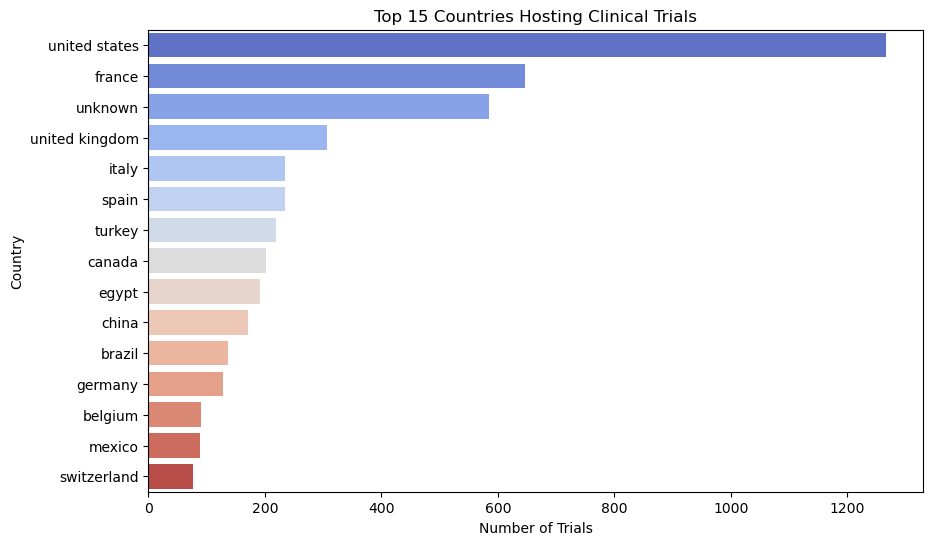

In [62]:
# Split by location (if multi-country, may need cleaning)
country_counts = (
    df["locations"]
    .dropna()
    .str.split(",").str[-1].str.strip()   # get country name
    .value_counts()
    .head(15)
)

plt.figure(figsize=(10,6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")
plt.title("Top 15 Countries Hosting Clinical Trials")
plt.xlabel("Number of Trials")
plt.ylabel("Country")
plt.show()

## study_type

In [39]:
df["study_type"].value_counts()

study_type
interventional                                                         3322
observational                                                          2427
expanded access:intermediate-size population                             15
expanded access:treatment ind/protocol                                    8
expanded access:intermediate-size population|treatment ind/protocol       5
expanded access:individual patients                                       3
expanded access:individual patients|intermediate-size population          1
expanded access                                                           1
expanded access:individual patients|treatment ind/protocol                1
Name: count, dtype: int64

In [40]:
df["study_type"] = df["study_type"].replace(
    to_replace=r"expanded access.*",  
    value="expanded access",
    regex=True
)

In [41]:
print(df["study_type"].value_counts())

study_type
interventional     3322
observational      2427
expanded access      34
Name: count, dtype: int64


<Axes: title={'center': 'Study Type Distribution'}, xlabel='study_type'>

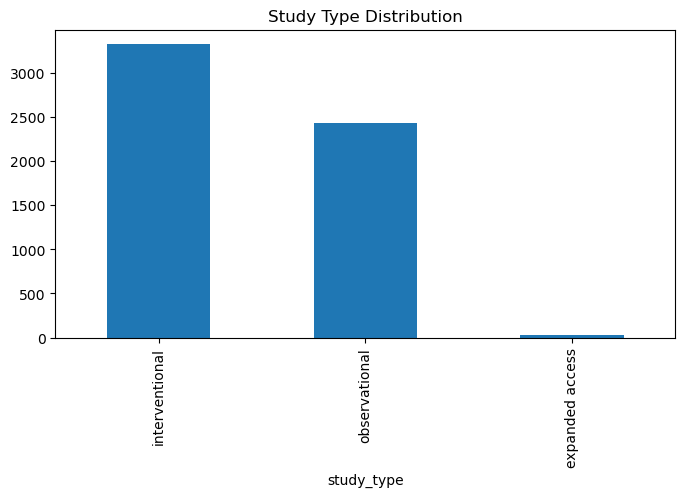

In [42]:
df["study_type"].value_counts().plot(kind="bar", figsize=(8,4), title="Study Type Distribution")

## Phases

In [43]:
df["phases"].value_counts()

phases
unknown           2899
not applicable    1354
phase 2            685
phase 3            450
phase 1            234
phase 4            161
Name: count, dtype: int64

<Axes: title={'center': 'Clinical Trial Phases'}, xlabel='phases'>

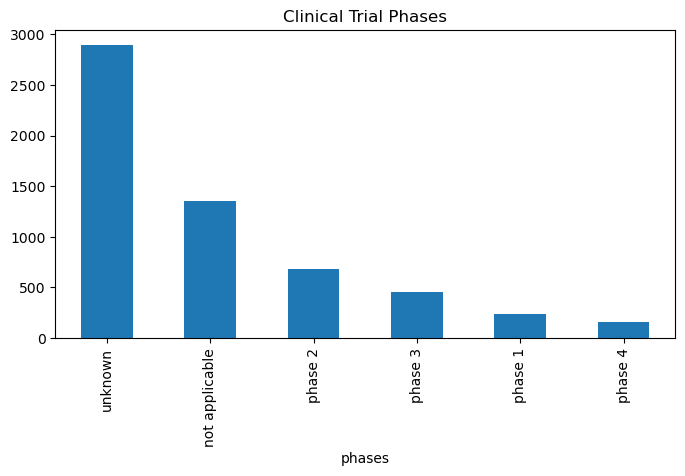

In [44]:
df["phases"].value_counts().plot(kind="bar", figsize=(8,4), title="Clinical Trial Phases")

## Enrollment

In [45]:
df["enrollment"].value_counts()

enrollment
100.0       350
200.0       244
60.0        176
30.0        173
50.0        168
           ... 
375.0         1
556.0         1
150000.0      1
70812.0       1
716.0         1
Name: count, Length: 953, dtype: int64

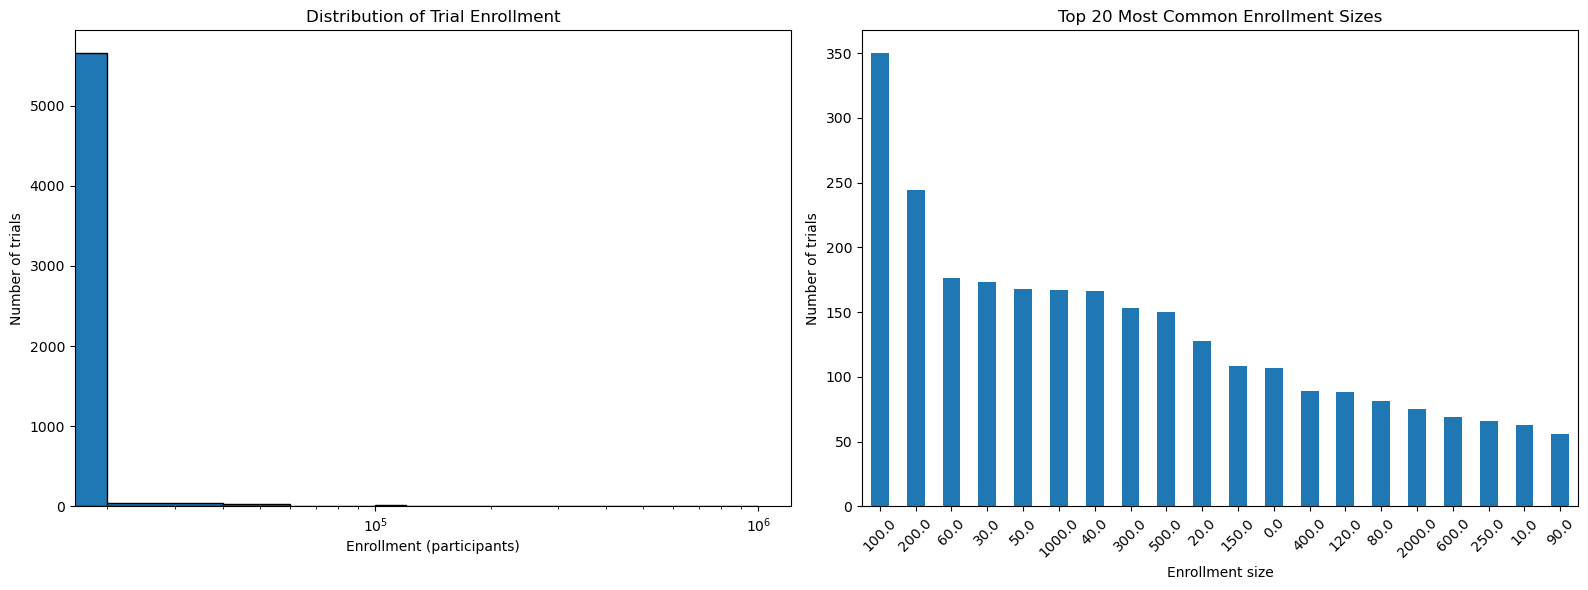

In [46]:
# Clean the enrollment column
enrollment = df['enrollment'].dropna().astype(float)

# Top 20 most frequent enrollment values
top_enrollment = enrollment.value_counts().head(20)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Histogram (distribution)
axes[0].hist(enrollment, bins=50, edgecolor="black")
axes[0].set_xlabel("Enrollment (participants)")
axes[0].set_ylabel("Number of trials")
axes[0].set_title("Distribution of Trial Enrollment")
axes[0].set_yscale("linear")
axes[0].set_xscale("log")   # optional, log scale helps with skewed data

# Bar chart (top 20 values)
top_enrollment.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel("Enrollment size")
axes[1].set_ylabel("Number of trials")
axes[1].set_title("Top 20 Most Common Enrollment Sizes")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

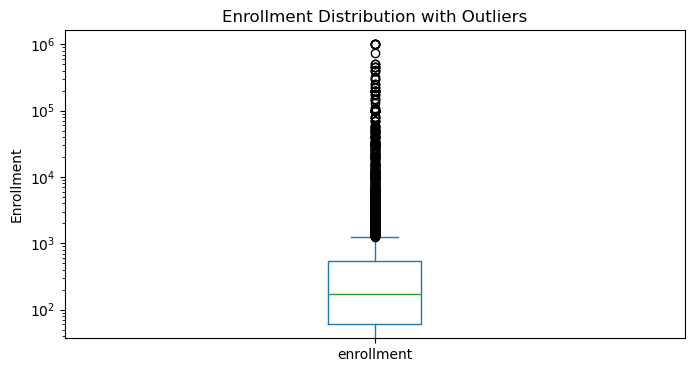

In [47]:
plt.figure(figsize=(8,4))
df['enrollment'].astype(float).plot.box()
plt.ylabel("Enrollment")
plt.title("Enrollment Distribution with Outliers")
plt.yscale("log")  # optional, makes big outliers visible
plt.show()

Number of extreme enrollment trials: 58


,title,conditions,enrollment
19,testing the accuracy of a digital test to diagnose covid-19,[covid-19],1000000.0
117,effect of h2 receptor antagonist and proton pump inhibitor on the positivity rates and clinical outcomes of covid-19,[covid-19],400000.0
153,covid-19 pandemic and worldwide organ procurement,[covid-19],230000.0
225,experience of an emergency intensive care unit during covid-19 pandemic,[covid19],100000.0
414,the c3i covid-19 project,"[covid19, cancer, nicotine dependence, pulmonary disease, cardiovascular diseases, immunosuppression disorders]",170000.0
426,western kenya integrated covid-19 response,[covid19],200000.0
437,duke covid-19 shared data and specimen repository,[covid-19],100000.0
461,"behavior, environment and treatments for covid-19",[coronavirus],100000.0
549,case fatalities in hospitalised covid-19 patients in the uk,[covid19],70000.0
590,text-based interventions to promote covid-19 vaccinations,"[covid19, vaccines]",400000.0


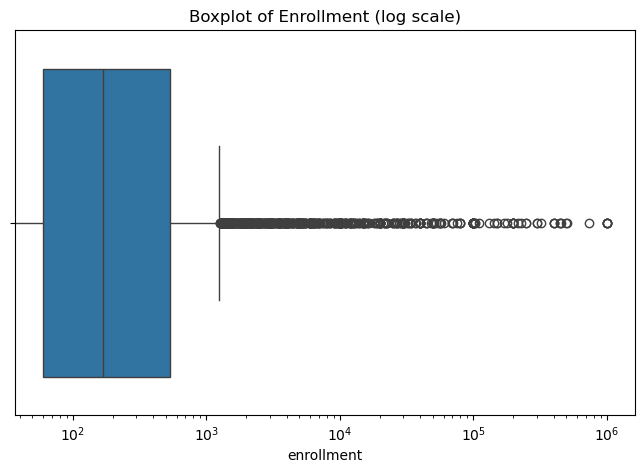

In [61]:
# Define extreme as above 99th percentile
threshold = df["enrollment"].quantile(0.99)
extreme_trials = df[df["enrollment"] > threshold]

print("Number of extreme enrollment trials:", len(extreme_trials))
display(extreme_trials[["title", "conditions", "enrollment"]].head(10))

# Plot
plt.figure(figsize=(8,5))
sns.boxplot(x=df["enrollment"])
plt.xscale("log")
plt.title("Boxplot of Enrollment (log scale)")
plt.show()

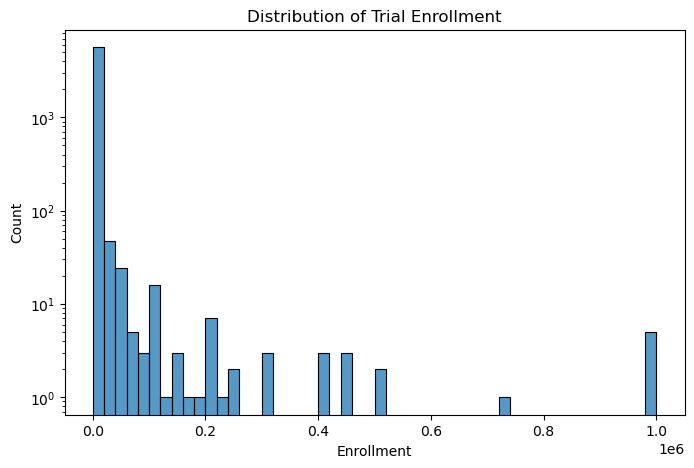

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['enrollment'], bins=50, kde=False)
plt.title("Distribution of Trial Enrollment")
plt.xlabel("Enrollment")
plt.ylabel("Count")
plt.yscale("log")  # log scale for skew
plt.show()

## Trials Started & Completed

In [52]:
df["start_year"] = df["start_date"].dt.year
df["completion_year"]=df["completion_date"].dt.year

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     5783 non-null   object        
 1   nct_number               5783 non-null   object        
 2   title                    5783 non-null   object        
 3   acronym                  5783 non-null   object        
 4   status                   5783 non-null   object        
 5   study_results            5783 non-null   object        
 6   conditions               5783 non-null   object        
 7   interventions            5783 non-null   object        
 8   outcome_measures         5783 non-null   object        
 9   sponsor_collaborators    5783 non-null   object        
 10  gender                   5783 non-null   object        
 11  age                      5783 non-null   object        
 12  phases                   5783 non-

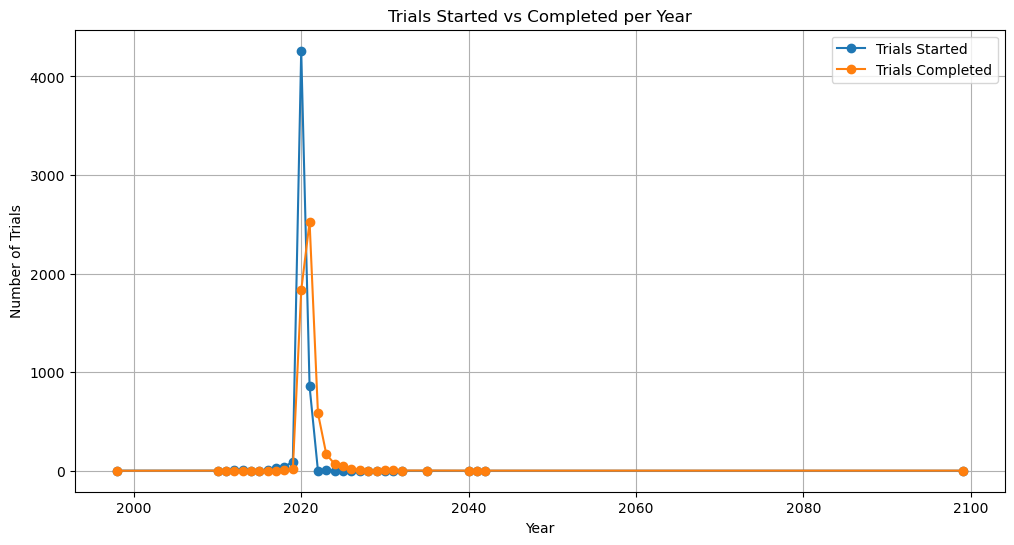

In [53]:
start_counts = df["start_year"].value_counts().sort_index()
completion_counts = df["completion_year"].value_counts().sort_index()

# Combine into one DataFrame
yearly = pd.DataFrame({
    "Trials Started": start_counts,
    "Trials Completed": completion_counts
}).fillna(0).astype(int)

# Plot
plt.figure(figsize=(12,6))
plt.plot(yearly.index, yearly["Trials Started"], marker="o", label="Trials Started")
plt.plot(yearly.index, yearly["Trials Completed"], marker="o", label="Trials Completed")
plt.xlabel("Year")
plt.ylabel("Number of Trials")
plt.title("Trials Started vs Completed per Year")
plt.legend()
plt.grid(True)
plt.show()


## interventions

In [56]:
df["interventions"].value_counts()

interventions
[unknown]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            886
[other: no intervention]                                                                                                                                                                                                                                                                                                                                                                                         

<Axes: title={'center': 'Top 20 Interventions'}, ylabel='interventions'>

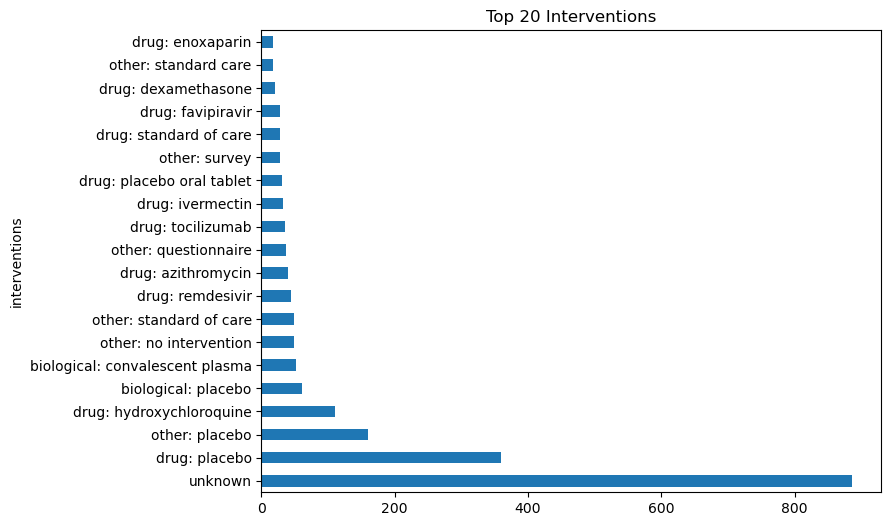

In [57]:
intervention_counts = df.explode("interventions")["interventions"].value_counts().head(20)
intervention_counts.plot(kind="barh", figsize=(8,6), title="Top 20 Interventions")

## sponsor/collaborators

<Axes: title={'center': 'Top 20 Sponsors/Collaborators'}, ylabel='sponsor_collaborators'>

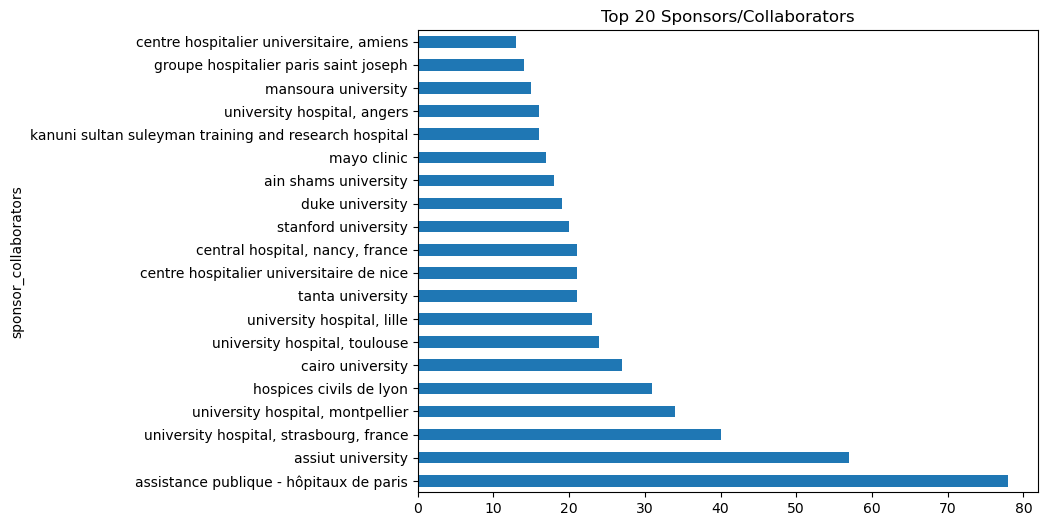

In [58]:
df["sponsor_collaborators"].value_counts().head(20).plot(kind="barh", figsize=(8,6), title="Top 20 Sponsors/Collaborators")

## Trial Status by Phases

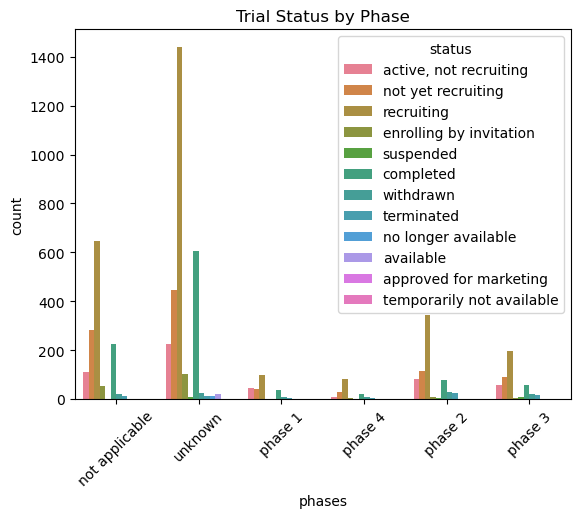

In [59]:
sns.countplot(data=df, x="phases", hue="status")
plt.title("Trial Status by Phase")
plt.xticks(rotation=45)
plt.show()

## Enrollment Distribution by Trial Phase

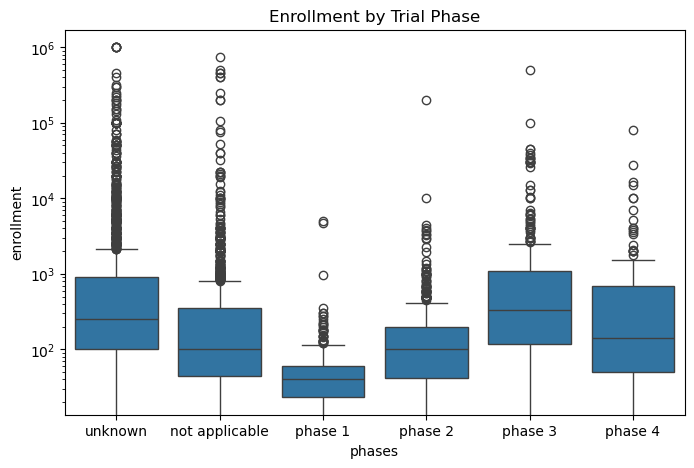

In [32]:
if "phases" in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="phases", y="enrollment", data=df)
    plt.yscale("log")
    plt.title("Enrollment by Trial Phase")
    plt.show()

## Completion Rates Across Phases

C:\Users\PC\AppData\Local\Temp\ipykernel_20824\3402205237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("phases")["status"]


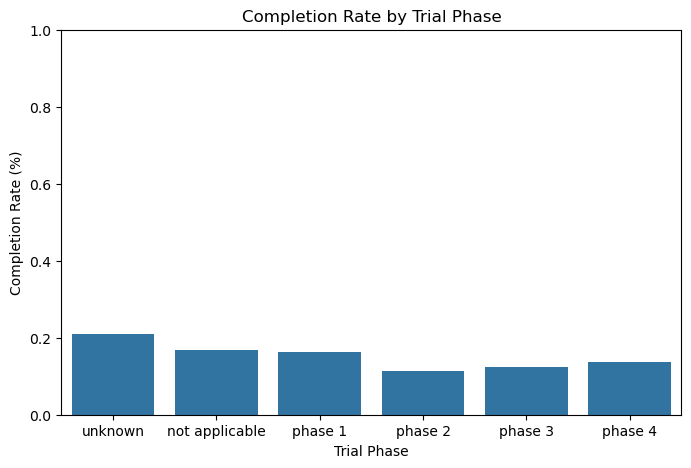

In [43]:
completion_rate = (
    df.groupby("phases")["status"]
      .apply(lambda x: (x=="completed").mean())
      .reset_index(name="completion_rate")
)

plt.figure(figsize=(8,5))
sns.barplot(x="phases", y="completion_rate", data=completion_rate)
plt.title("Completion Rate by Trial Phase")
plt.xlabel("Trial Phase")
plt.ylabel("Completion Rate (%)")
plt.ylim(0,1)
plt.show()

## Survival Curves (Kaplan-Meier) for Trial Durations

#### Kaplan-Meier survival curves are commonly used in medical research to estimate the probability of survival over time.

In [48]:
from lifelines import KaplanMeierFitter
df["trial_duration"] = (df["completion_date"] - df["start_date"]).dt.days
df["event"] = df["status"].apply(lambda x: 1 if x=="completed" else 0)

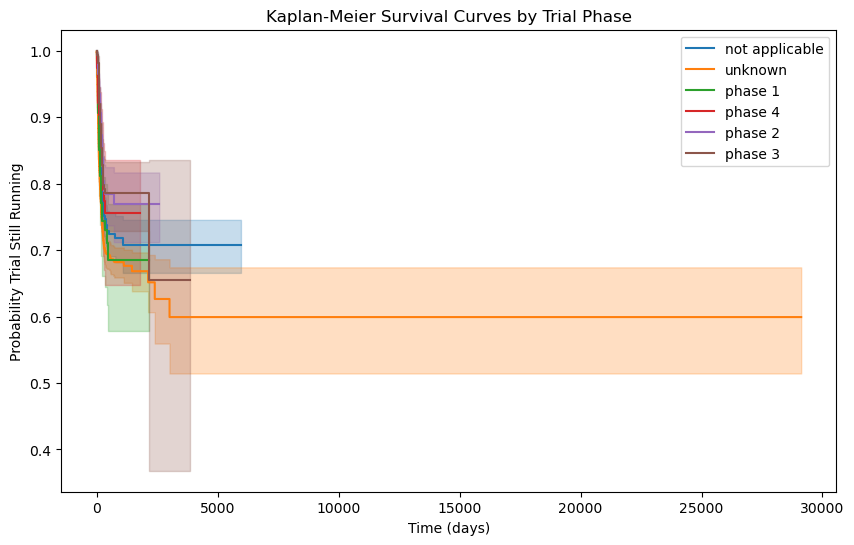

In [52]:
kmf = KaplanMeierFitter()
plt.figure(figsize=(10,6))
for phase in df["phases"].dropna().unique():
    mask = df["phases"] == phase
    sub = df.loc[mask, ["trial_duration", "event"]].dropna()   
    if len(sub) > 0:  # avoid empty groups
        kmf.fit(sub["trial_duration"], event_observed=sub["event"], label=str(phase))
        kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curves by Trial Phase")
plt.xlabel("Time (days)")
plt.ylabel("Probability Trial Still Running")
plt.show()

## Correlation

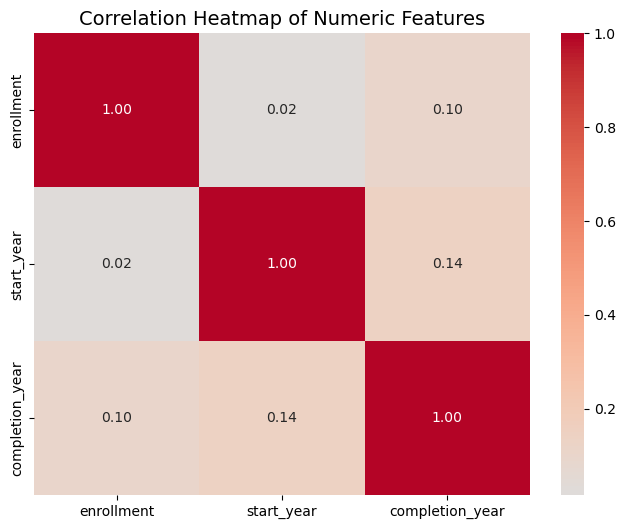

In [89]:
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

## Testing

#### 1.Do the number of trials started in a given year significantly differ from the number of trials completed, and are they correlated over time?

#### Null hypothesis (H₀):
The mean difference between “Trials Started” and “Trials Completed” per year is 0.
(On average, the number started and completed are the same.)
#### Alternative hypothesis (H₁):
The mean difference is not 0.
(On average, the number started ≠ number completed.)

In [90]:
from scipy.stats import ttest_rel, pearsonr
common_years = yearly.dropna()

In [91]:
t_stat, p_val = ttest_rel(common_years["Trials Started"], common_years["Trials Completed"])
print("Paired t-test: t =", t_stat, ", p =", p_val)
corr, p_corr = pearsonr(common_years["Trials Started"], common_years["Trials Completed"])
print("Correlation: r =", corr, ", p =", p_corr)

Paired t-test: t = 0.0 , p = 1.0
Correlation: r = 0.7024526291203506 , p = 2.1570710377725206e-05


In [92]:
from scipy.stats import shapiro

# Difference between started and completed
diff = common_years["Trials Started"] - common_years["Trials Completed"]

# Shapiro-Wilk test
stat, p_shapiro = shapiro(diff)
print("Shapiro-Wilk test: stat =", stat, ", p =", p_shapiro)


Shapiro-Wilk test: stat = 0.4452918237519037 , p = 2.190336373611843e-09


In [93]:
from scipy.stats import wilcoxon

stat, p_wilcoxon = wilcoxon(common_years["Trials Started"], common_years["Trials Completed"])
print("Wilcoxon test: stat =", stat, ", p =", p_wilcoxon)

Wilcoxon test: stat = 157.0 , p = 0.2930066293315927


#### 2.Do enrollment sizes differ significantly across clinical trial statuses?

### Null Hypothesis (H₀): 
Enrollment distributions are the same across all trial statuses.

### Alternative Hypothesis (H₁):
At least one trial status has a significantly different enrollment distribution.

In [61]:
df.groupby("status")["enrollment"].apply(lambda x: x.dropna().shape[0])

status
active, not recruiting        526
approved for marketing          2
available                      19
completed                    1025
enrolling by invitation       181
no longer available            12
not yet recruiting           1004
recruiting                   2805
suspended                      27
temporarily not available       1
terminated                     74
withdrawn                     107
Name: enrollment, dtype: int64

In [62]:
df.groupby("status")["enrollment"].nunique()

status
active, not recruiting       268
approved for marketing         1
available                      1
completed                    479
enrolling by invitation       83
no longer available            1
not yet recruiting           299
recruiting                   483
suspended                     23
temporarily not available      1
terminated                    52
withdrawn                      1
Name: enrollment, dtype: int64

In [66]:
groups = [g.dropna() for _, g in df.groupby("status")["enrollment"] if g.nunique() > 1]
stat, p = kruskal(*groups)
print("Kruskal-Wallis test: stat =", stat, ", p =", p)

Kruskal-Wallis test: stat = 139.90743211217074 , p = 1.0483195384940306e-27


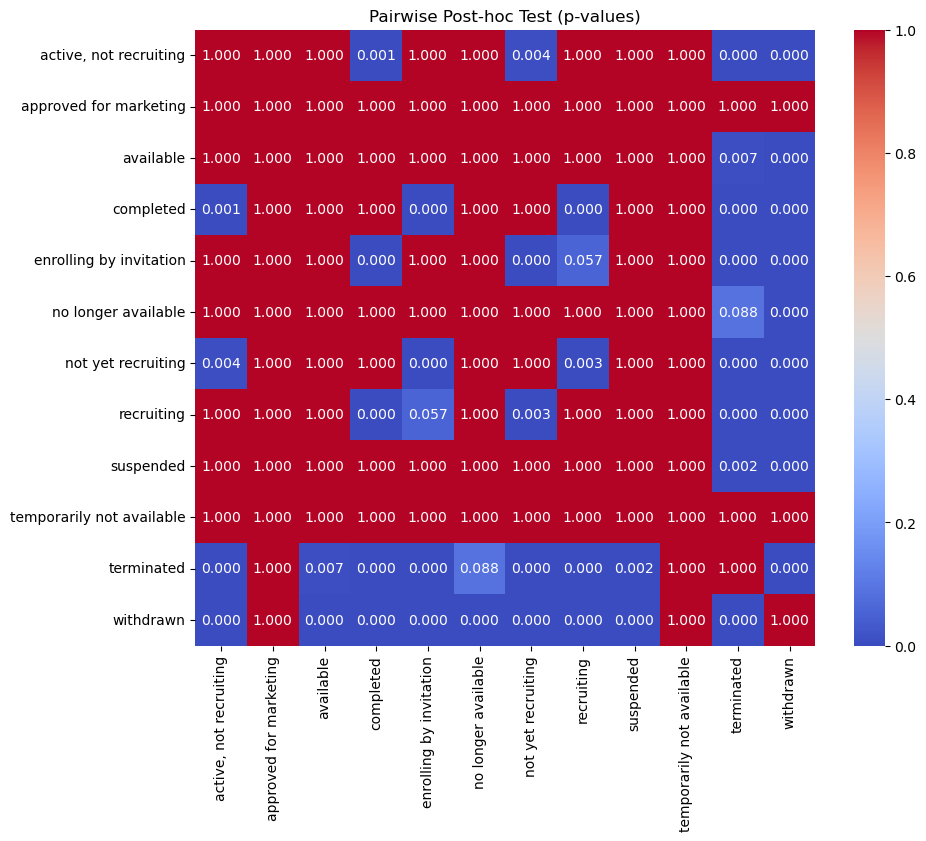

In [67]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df, val_col="enrollment", group_col="status", p_adjust="bonferroni")
plt.figure(figsize=(10,8))
sns.heatmap(posthoc, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Post-hoc Test (p-values)")
plt.show()

#### 3.Do later-phase trials (like Phase 3 or Phase 4) have higher participant enrollments compared to early-phase trials (Phase 1 or 2)?

### Null (H₀): 
Median/mean enrollment is the same across all phases.
### Alternative (H₁): 
At least one phase differs in enrollment from the others.

In [68]:
from scipy.stats import kruskal

# Group enrollments by phase
groups = [
    df.loc[df["phases"]=="phase 1", "enrollment"],
    df.loc[df["phases"]=="phase 2", "enrollment"],
    df.loc[df["phases"]=="phase 3", "enrollment"],
    df.loc[df["phases"]=="phase 4", "enrollment"]
]

# Kruskal-Wallis test
stat, p = kruskal(*groups)
print("Kruskal-Wallis test: stat =", stat, ", p =", p)


Kruskal-Wallis test: stat = 366.15033113410374 , p = 4.746974364080358e-79


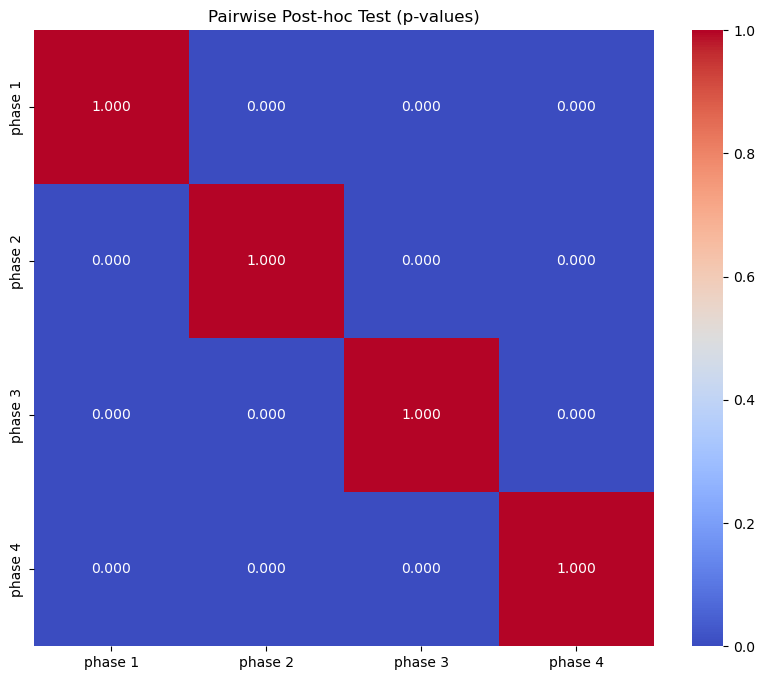

In [69]:
posthoc = sp.posthoc_dunn(df[df["phases"].isin(["phase 1","phase 2","phase 3","phase 4"])], val_col="enrollment", group_col="phases", p_adjust="bonferroni")
plt.figure(figsize=(10,8))
sns.heatmap(posthoc, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Post-hoc Test (p-values)")
plt.show()

In [70]:
df['sponsor_type'].value_counts()

sponsor_type
University        2630
Other             1498
Hospital           827
Industry           533
Government/NGO     295
Name: count, dtype: int64

#### 4.Do enrollment sizes differ significantly across sponsor types?

#### null hypothesis (H₀): 
Enrollment distributions are the same across sponsor types.
#### alternative (H₁): 
At least one sponsor type has a different enrollment distribution.

In [72]:
from scipy.stats import kruskal

groups = [
    df.loc[df["sponsor_type"]=="University", "enrollment"],
    df.loc[df["sponsor_type"]=="Hospital", "enrollment"],
    df.loc[df["sponsor_type"]=="Industry", "enrollment"],
    df.loc[df["sponsor_type"]=="Government/NGO", "enrollment"],
]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis: stat={stat:.4f}, p={p:.4e}")

Kruskal-Wallis: stat=34.1206, p=1.8683e-07


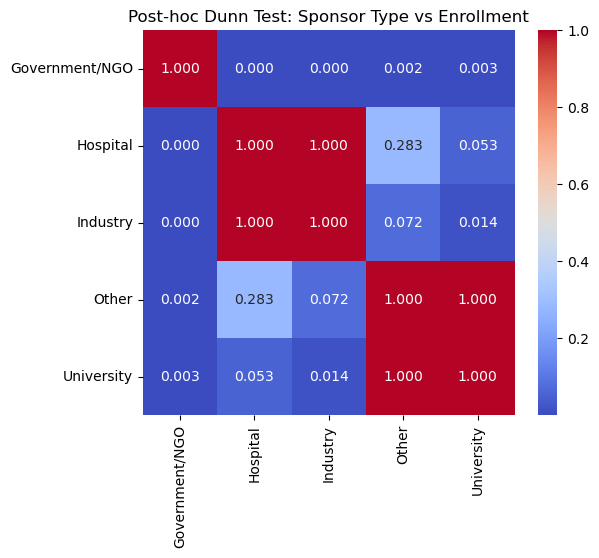

In [74]:
posthoc = sp.posthoc_dunn(
    df,
    val_col="enrollment",
    group_col="sponsor_type",
    p_adjust="bonferroni"
)
plt.figure(figsize=(6,5))
sns.heatmap(posthoc, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Post-hoc Dunn Test: Sponsor Type vs Enrollment")
plt.show()